### Outliers
The outliers may suggest experimental errors, variability in a measurement, or an anomaly. The age of a person may wrongly be recorded as 200 rather than 20 Years. Such an outlier should definitely be discarded from the dataset. <br>

### Significance of outliers:

    1.Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
    2.Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
    3.Outliers are highly useful in anomaly detection like fraud detection where the fraud transactions are very different from normal transactions.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/heights.csv")
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


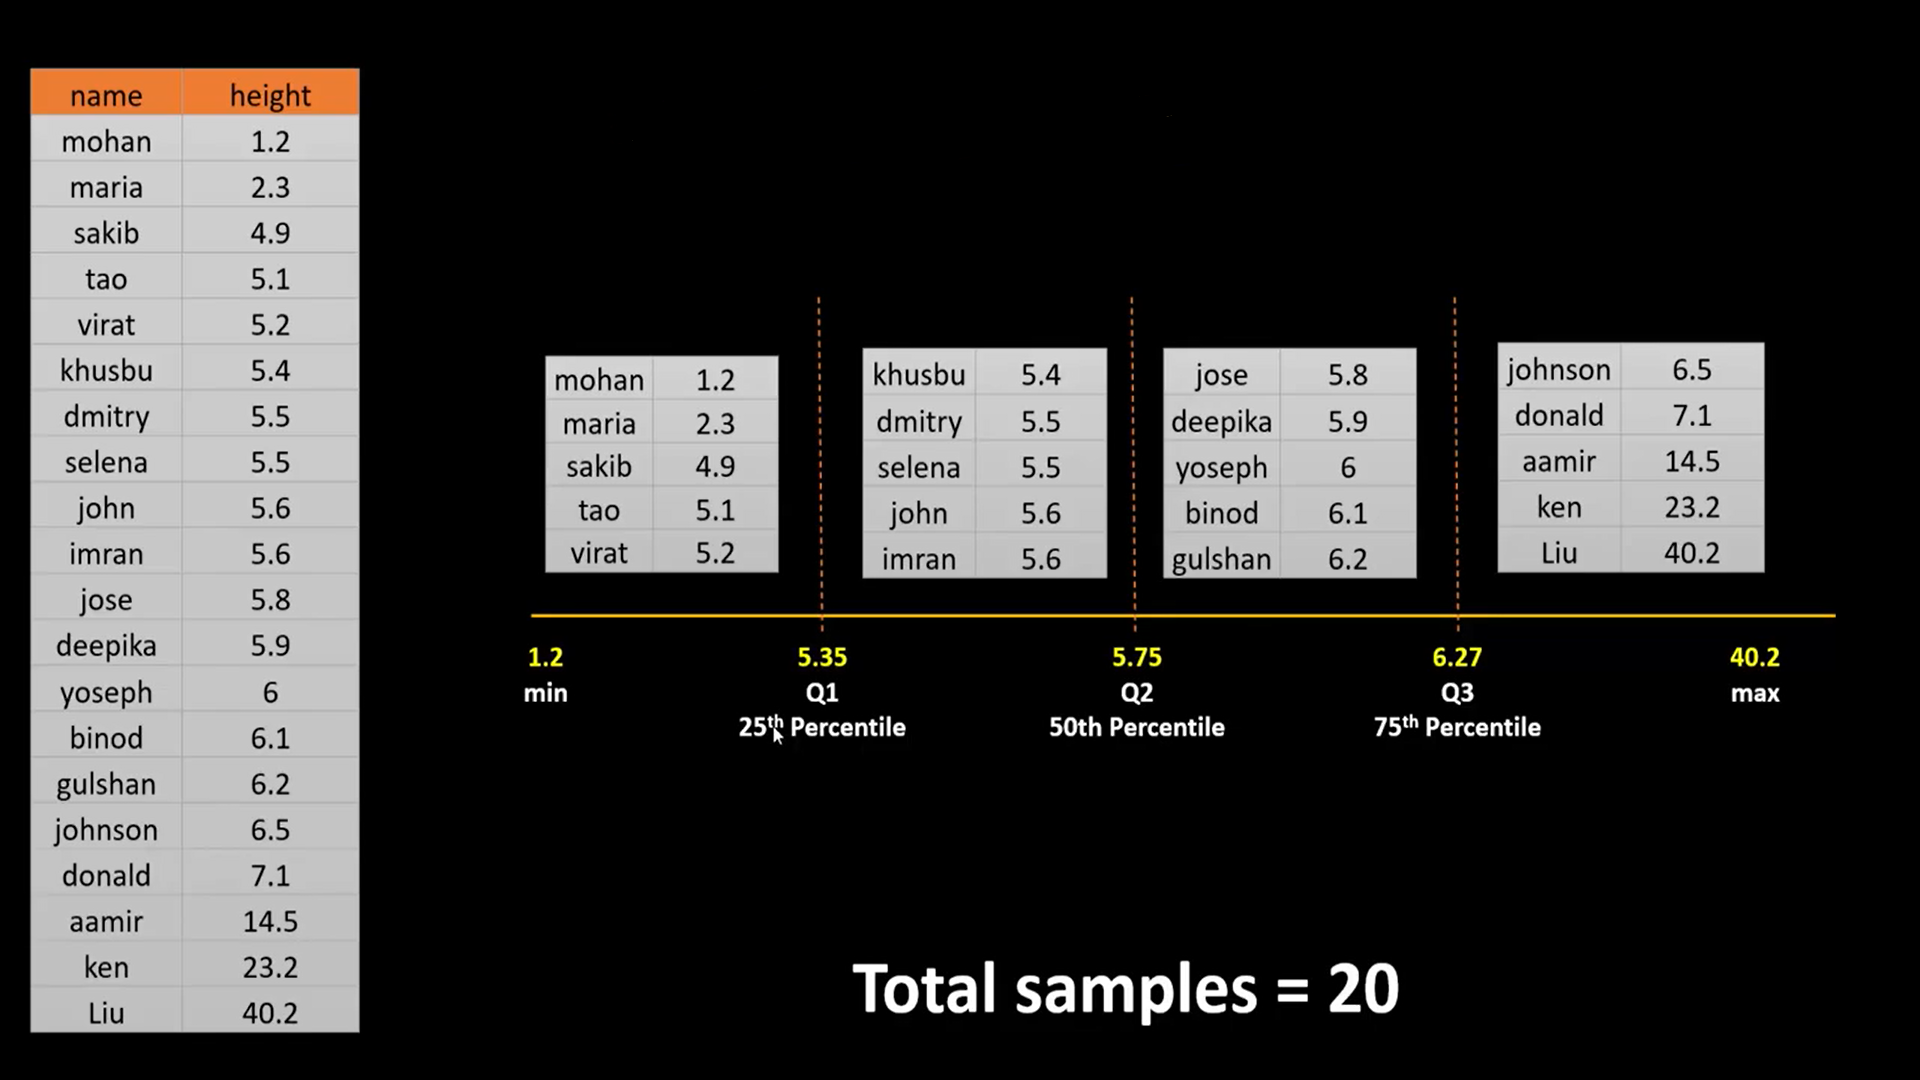

### Detect outliers using percentile

In [3]:
max_thresold = df['height'].quantile(0.95) # finds the corresponding data at 95%
max_thresold

9.689999999999998

In [4]:
df[df['height']>max_thresold]  # returns data greater than 95% threshold

,name,height
9,imran,14.5


In [5]:
min_thresold = df['height'].quantile(0.05) # finds the corresponding data at 5%
min_thresold

3.6050000000000004

In [6]:
df[df['height']<min_thresold]   # returns data greater than 5% threshold

,name,height
12,yoseph,1.2


### Remove Outliers

In [7]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)] # removes values greater than 95% and values less than 5%

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


## Now, lets explore Banglore Property Prices dataset

In [8]:
df = pd.read_csv("Datasets/bangalore_house_price.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [9]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [10]:
df.shape

(13200, 7)

### Explore samples that are above 99.90% percentile and below 1% percentile rank

In [11]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000098)

In [12]:
df[df.price_per_sqft < min_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [13]:
df[df.price_per_sqft > max_thresold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


### Remove Outliers

In [14]:
df2 = df[(df.price_per_sqft<max_thresold) & (df.price_per_sqft>min_thresold)]
df2.shape

(13172, 7)

In [15]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000
